# Group 27 DSCI 100: Project Proposal

### 1. Introduction:
(Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question)


Life expectancy is a statistic that varies throughout countries based on many factors. A common question in healthcare is continued to be asked: what can be done to improve life expectancy? As countries continue to improve on this aspect, the statistics are crucial to prove statements and observe trends. It is often dicussed how much effort should go into health expenditure which defines the amount spent on health care and services such as research, insurance, and more. 
Through this project the analysis of the relationship between life expectancy and health expenditure will be observed. 
"How much can we improve life expectancy by increasing health expenditure?"
The dataset used will list the data collected on life expectancy, health expenditure, bmi, mortality rates, and more... all sorted by country in an alphabetically ordered fashion. In this project, the columns of importance will be country, life expectancy, and health expenditure.



### 2. Tidy Data:


**2.1.** Our data was The Global Health Observatory (GHO) data repository under **World Health Organization (WHO)**: https://www.who.int/data/gho

- country 
- year

Mortality Variables
- life_expectancy: Life Expectancy in age
- adult_mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant_deaths: Number of Infant Deaths per 1000 population
- under_five_deaths: Number of under-five deaths per 1000 population

Health Variables
- hepatitis_b: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- measles: Measles - number of reported cases per 1000 population
- polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)


**2.2.** We combine GDP and Population Data taken from the **World Bank**: https://databank.worldbank.org/home.aspx

- country
- year
- gdp (current USD)
- population (total)
- current health expenditure per capita (current USD)

We create new variables:

- Country classification (based on GDP per capita): Low-income (<4,000), Medium-income 
(4,000-13,000), High-income (13,000+)
- Health expenditure as a % of GDP (health expenditure / GDP)

In [1]:
### Setup packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

In [2]:
# wrangling world bank data to tidy format

world_bank_data <- read_csv("data/world_bank_data.csv")

population <- world_bank_data %>%
    filter(Series_Name == "Population, total") %>%
    gather(year, population, 3:18, factor_key=TRUE) %>%
    select(- Series_Name) %>%
    mutate(population = as.numeric(population))

gdp <- world_bank_data %>%
    filter(Series_Name == "GDP (current US$)") %>%
    gather(year, gdp, 3:18, factor_key=TRUE) %>%
    select(- Series_Name) %>%
    mutate(gdp = as.numeric(gdp))

health_exp <- world_bank_data %>%
    filter(Series_Name == "Current health expenditure per capita (current US$)") %>%
    gather(year, health_exp_per_capita, 3:18, factor_key=TRUE) %>%
    select(- Series_Name) %>%
    mutate(health_exp_per_capita = as.numeric(health_exp_per_capita))

world_bank_combined <- merge(population, gdp, by=c("Country_Name","year"))

world_bank_combined <- merge(world_bank_combined, health_exp, by=c("Country_Name","year")) %>%
    rename(c('country'='Country_Name'))


world_bank_combined


Parsed with column specification:
cols(
  Series_Name = col_character(),
  Country_Name = col_character(),
  `2000` = col_character(),
  `2001` = col_character(),
  `2002` = col_character(),
  `2003` = col_character(),
  `2004` = col_character(),
  `2005` = col_character(),
  `2006` = col_character(),
  `2007` = col_character(),
  `2008` = col_character(),
  `2009` = col_character(),
  `2010` = col_character(),
  `2011` = col_character(),
  `2012` = col_character(),
  `2013` = col_character(),
  `2014` = col_character(),
  `2015` = col_character()
)

Warning message:
“Problem with `mutate()` input `population`.
ℹ NAs introduced by coercion
ℹ Input `population` is `as.numeric(population)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `gdp`.
ℹ NAs introduced by coercion
ℹ Input `gdp` is `as.numeric(gdp)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“

country,year,population,gdp,health_exp_per_capita
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Afghanistan,2000,20779957,NA,NA
Afghanistan,2001,21606992,NA,NA
Afghanistan,2002,22600774,4055179566,15.80316
Afghanistan,2003,23680871,4515558808,17.03574
Afghanistan,2004,24726689,5226778809,20.41276
Afghanistan,2005,25654274,6209137625,23.89050
Afghanistan,2006,26433058,6971285595,27.83657
Afghanistan,2007,27100542,9747879532,31.27184
Afghanistan,2008,27722281,10109225814,38.10266


In [3]:
#import WHO data and combine with World Bank data

who_data <- read_csv("data/who_data.csv") %>%
    select(-bmi, -alcohol)

combined_data <- merge(who_data, world_bank_combined, by=c("country","year"))

Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(),
  life_expectancy = col_double(),
  adult_mortality = col_double(),
  infant_deaths = col_double(),
  alcohol = col_double(),
  hepatitis_b = col_double(),
  measles = col_double(),
  bmi = col_double(),
  under_five_deaths = col_double(),
  polio = col_double(),
  diphtheria = col_double(),
  HIV_AIDS = col_double()
)



In [4]:
# adding variables

combined_data_mutated <- combined_data %>% 
    mutate(gdp_per_capita = gdp / population) %>%
    mutate(health_exp_to_gdp = health_exp_per_capita / gdp_per_capita * 100) %>%
    mutate(gdp_classification = as.factor(ifelse(gdp_per_capita < 4000, "Low-Income",
                                      ifelse(gdp_per_capita < 13000,"Medium-Income", 
                                                         "High-Income"))))
combined_data_mutated


country,year,life_expectancy,adult_mortality,infant_deaths,hepatitis_b,measles,under_five_deaths,polio,diphtheria,HIV_AIDS,population,gdp,health_exp_per_capita,gdp_per_capita,health_exp_to_gdp,gdp_classification
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,2000,54.8,321,88,62,6532,122,24,24,0.1,20779957,NA,NA,NA,NA,NA
Afghanistan,2001,55.3,316,88,63,8762,122,35,33,0.1,21606992,NA,NA,NA,NA,NA
Afghanistan,2002,56.2,3,88,64,2486,122,36,36,0.1,22600774,4055179566,15.80316,179.4266,8.807593,Low-Income
Afghanistan,2003,56.7,295,87,65,798,122,41,41,0.1,23680871,4515558808,17.03574,190.6838,8.934027,Low-Income
Afghanistan,2004,57.0,293,87,67,466,120,5,5,0.1,24726689,5226778809,20.41276,211.3821,9.656809,Low-Income
Afghanistan,2005,57.3,291,85,66,1296,118,58,58,0.1,25654274,6209137625,23.89050,242.0313,9.870831,Low-Income
Afghanistan,2006,57.3,295,84,64,1990,116,58,58,0.1,26433058,6971285595,27.83657,263.7336,10.554806,Low-Income
Afghanistan,2007,57.5,295,82,63,1141,113,63,63,0.1,27100542,9747879532,31.27184,359.6932,8.694032,Low-Income
Afghanistan,2008,58.1,287,80,64,1599,110,64,64,0.1,27722281,10109225814,38.10266,364.6607,10.448799,Low-Income


In [28]:
# Spliting data into training and testing


combined_split <- initial_split(combined_data_mutated, prop = 0.75)
training <- training(combined_split)
testing <- testing(combined_split)

training
testing


,country,year,life_expectancy,adult_mortality,infant_deaths,hepatitis_b,measles,under_five_deaths,polio,diphtheria,HIV_AIDS,population,gdp,health_exp_per_capita,gdp_per_capita,health_exp_to_gdp,gdp_classification
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,Afghanistan,2001,55.3,316,88,63,8762,122,35,33,0.1,21606992,NA,NA,NA,NA,NA
4,Afghanistan,2003,56.7,295,87,65,798,122,41,41,0.1,23680871,4515558808,17.03574,190.6838,8.934027,Low-Income
5,Afghanistan,2004,57.0,293,87,67,466,120,5,5,0.1,24726689,5226778809,20.41276,211.3821,9.656809,Low-Income
6,Afghanistan,2005,57.3,291,85,66,1296,118,58,58,0.1,25654274,6209137625,23.89050,242.0313,9.870831,Low-Income
7,Afghanistan,2006,57.3,295,84,64,1990,116,58,58,0.1,26433058,6971285595,27.83657,263.7336,10.554806,Low-Income
8,Afghanistan,2007,57.5,295,82,63,1141,113,63,63,0.1,27100542,9747879532,31.27184,359.6932,8.694032,Low-Income
10,Afghanistan,2009,58.6,281,77,63,2861,106,63,63,0.1,28394806,12439087077,41.72274,438.0761,9.524085,Low-Income
11,Afghanistan,2010,58.8,279,74,66,1989,102,66,66,0.1,29185511,15856574731,44.99053,543.3030,8.280929,Low-Income
13,Afghanistan,2012,59.5,272,69,67,2787,93,67,67,0.1,31161378,20001598506,51.44026,641.8714,8.014107,Low-Income


,country,year,life_expectancy,adult_mortality,infant_deaths,hepatitis_b,measles,under_five_deaths,polio,diphtheria,HIV_AIDS,population,gdp,health_exp_per_capita,gdp_per_capita,health_exp_to_gdp,gdp_classification
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Afghanistan,2000,54.8,321,88,62,6532,122,24,24,0.1,20779957,NA,NA,NA,NA,NA
3,Afghanistan,2002,56.2,3,88,64,2486,122,36,36,0.1,22600774,4.055180e+09,15.80316,179.4266,8.807593,Low-Income
9,Afghanistan,2008,58.1,287,80,64,1599,110,64,64,0.1,27722281,1.010923e+10,38.10266,364.6607,10.448799,Low-Income
12,Afghanistan,2011,59.2,275,71,68,3013,97,68,68,0.1,30117411,1.780429e+10,50.85347,591.1628,8.602279,Low-Income
21,Albania,2004,73.0,17,1,99,7,1,98,97,0.1,3026939,7.184681e+09,156.56818,2373.5798,6.596289,Low-Income
23,Albania,2006,74.2,99,1,98,68,1,97,97,0.1,2992547,8.896074e+09,174.53024,2972.7433,5.871016,Low-Income
27,Albania,2010,76.2,91,1,99,10,1,99,99,0.1,2913021,1.192693e+10,192.00322,4094.3503,4.689467,Medium-Income
31,Albania,2014,77.5,8,0,98,0,1,98,98,0.1,2889104,1.322814e+10,251.35826,4578.6320,5.489811,Medium-Income
35,Algeria,2002,71.6,145,20,NA,5862,23,86,86,0.1,31855110,5.676032e+10,66.46336,1781.8277,3.730066,Low-Income


### 3. Tables & Graphs:

**3.1. Tables:**

- Table 1: Summary Table of number of observations for each variable
- Table 2: Average health expenditure per capita for each gdp_classification
- Table 3: Average gdp per capita for each gdp_classification


In [25]:
# Table 1
training %>%
    group_by(gdp_classification) %>%
    summarize(average_gdp = mean(health_exp_per_capita, na.rm = TRUE)) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

# Table 2
training %>%
    group_by(gdp_classification) %>%
    summarize(average_gdp = mean(gdp_per_capita, na.rm = TRUE)) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")

`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,average_gdp
<fct>,<dbl>
High-Income,2672.75200
Low-Income,79.94069
Medium-Income,428.12306


`summarise()` ungrouping output (override with `.groups` argument)



gdp_classification,average_gdp
<fct>,<dbl>
High-Income,35232.772
Low-Income,1428.133
Medium-Income,7229.789


**3.2. Graphs:**


**Graph Set 1**

We graph the average ratio of health expenditure per capita to GDP per capita of each low, medium, and high income countries (classified by GDP) across time.

`summarise()` regrouping output by 'gdp_classification' (override with `.groups` argument)



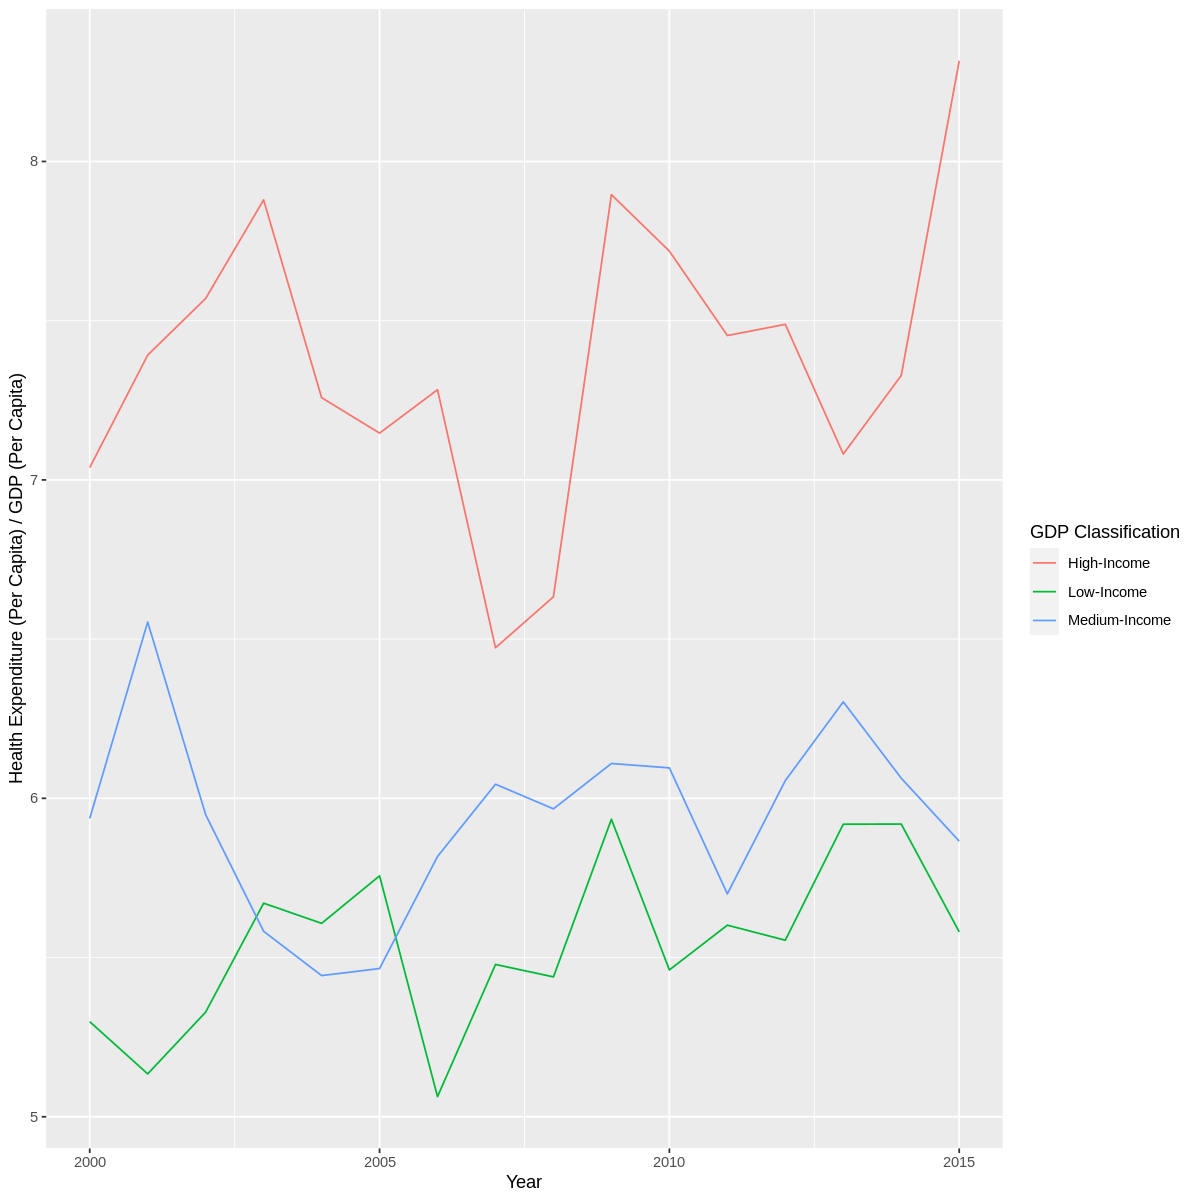

In [31]:
options(repr.plot.width = 10, repr.plot.height = 10)

average_ratio <- training %>%
    select(country, year, gdp_classification, health_exp_to_gdp) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income") %>%
    group_by(gdp_classification, year) %>%
    summarize(average_ratio = mean(health_exp_to_gdp, na.rm = TRUE))

Proposal_Plot_1 <- average_ratio %>%
ggplot(aes(x = year, y = average_ratio, color = gdp_classification))+
geom_line()+
labs(x= "Year", y= "Health Expenditure (Per Capita) / GDP (Per Capita)", color = "GDP Classification") 

Proposal_Plot_1

**Graph Set 2**

We graph mortality variables against health expenditure for 2013 in the training set.

Warning message:
“Removed 9 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


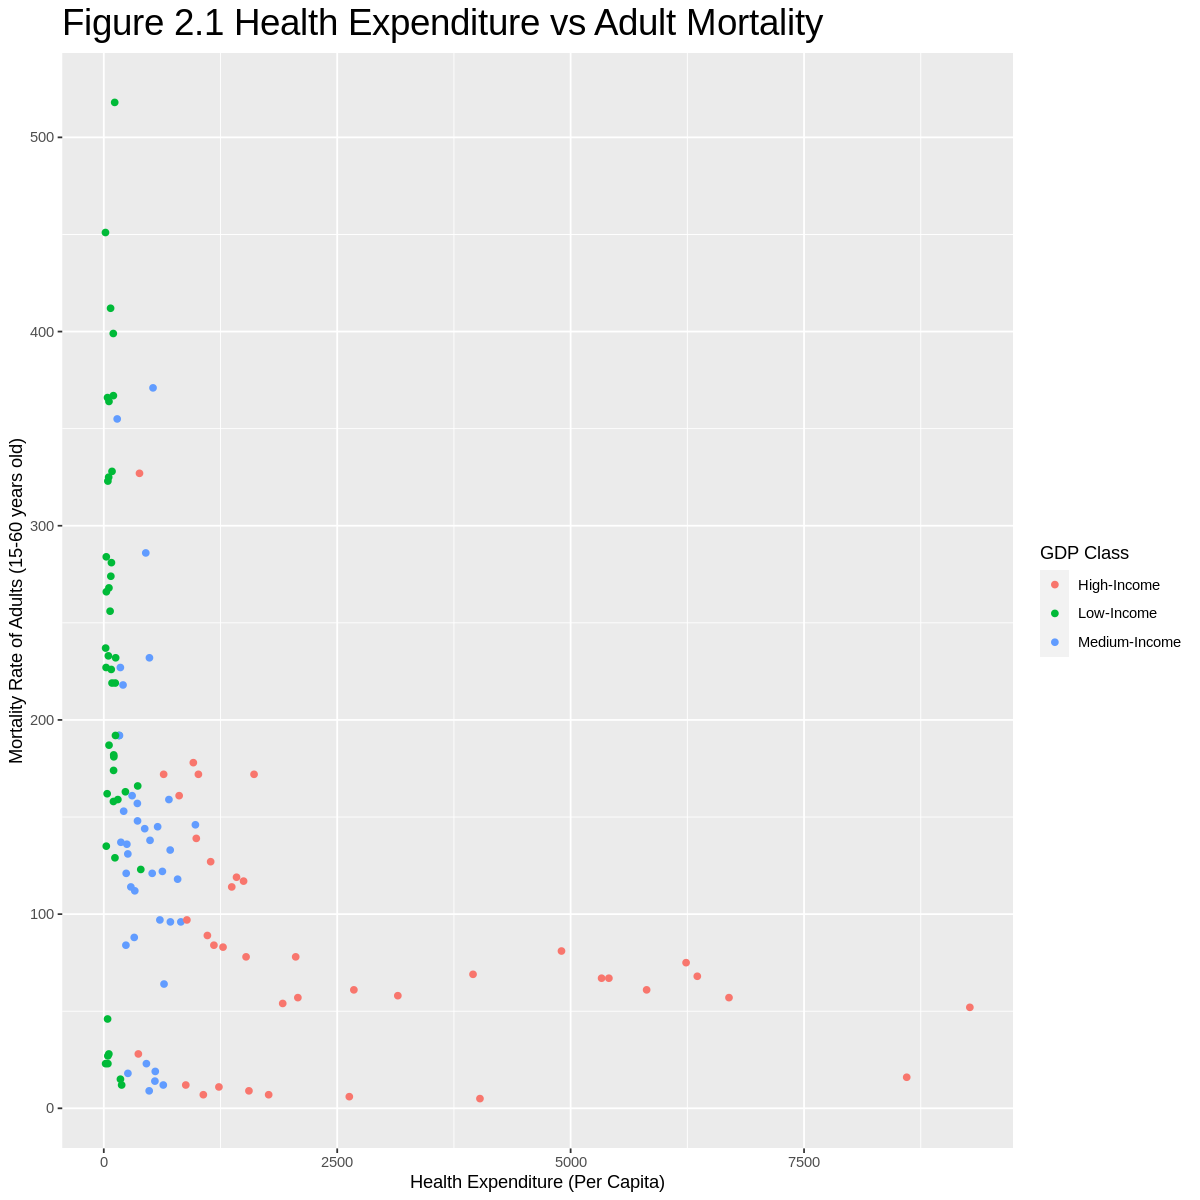

Warning message:
“Removed 1 rows containing missing values (geom_point).”


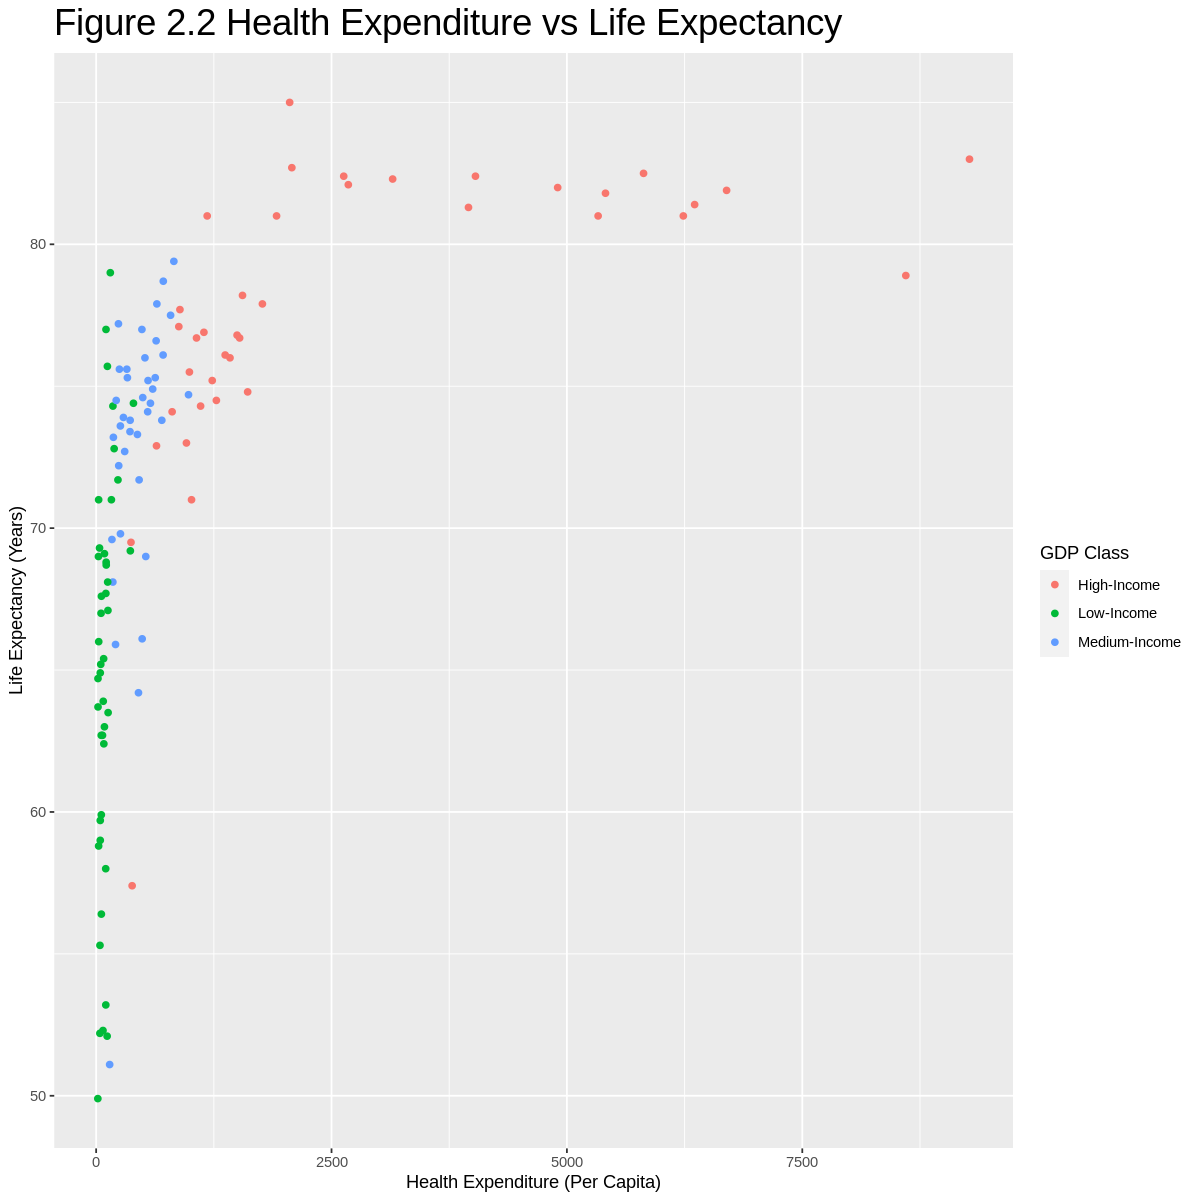

Warning message:
“Removed 1 rows containing missing values (geom_point).”


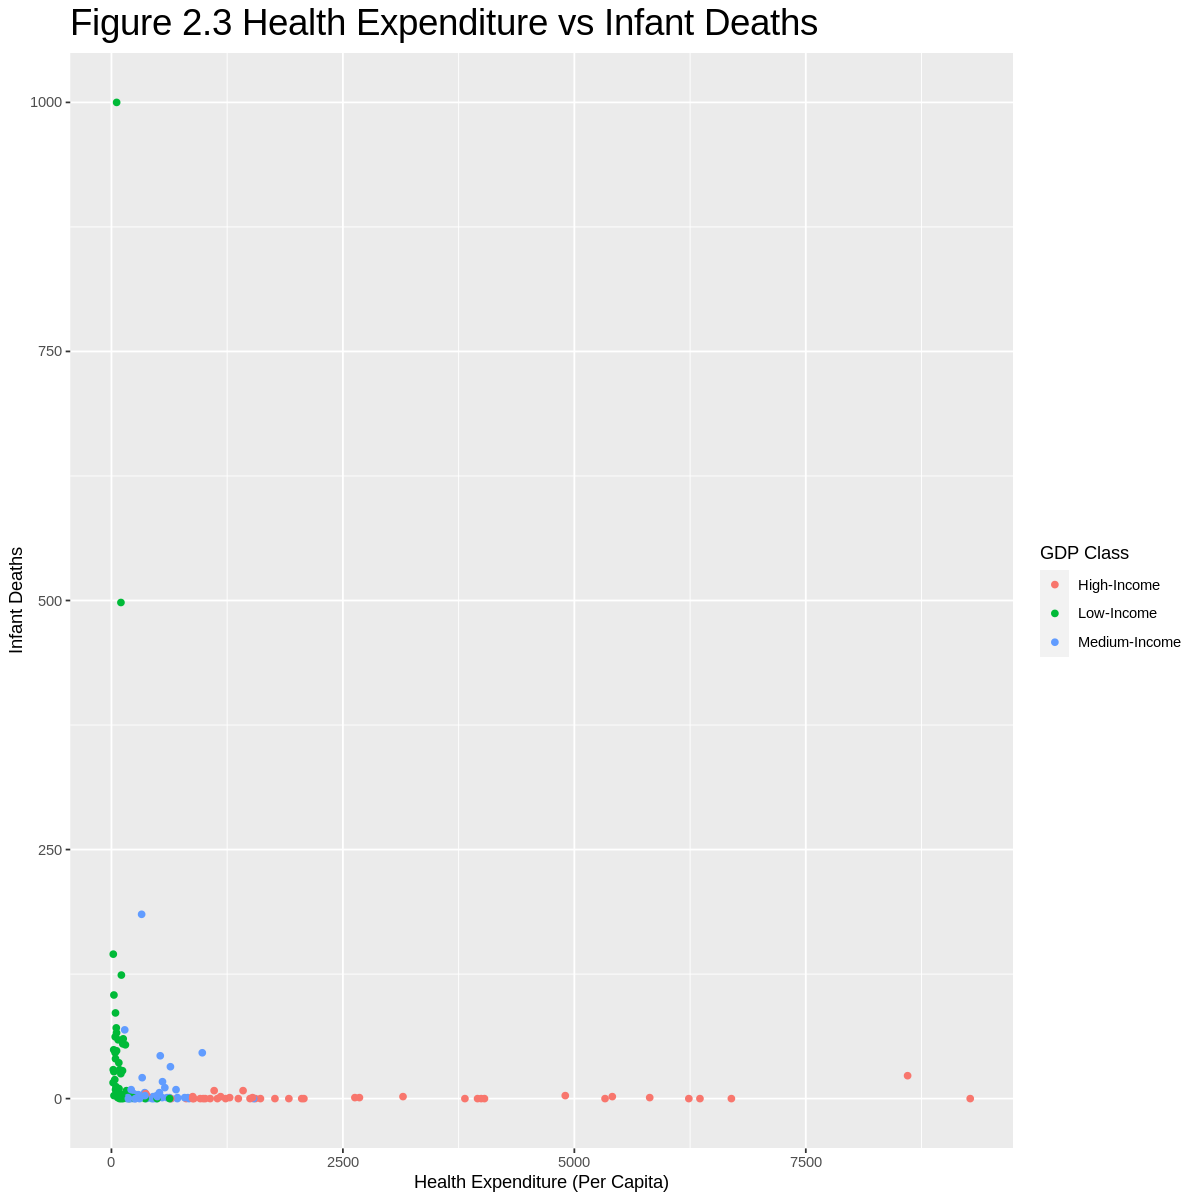

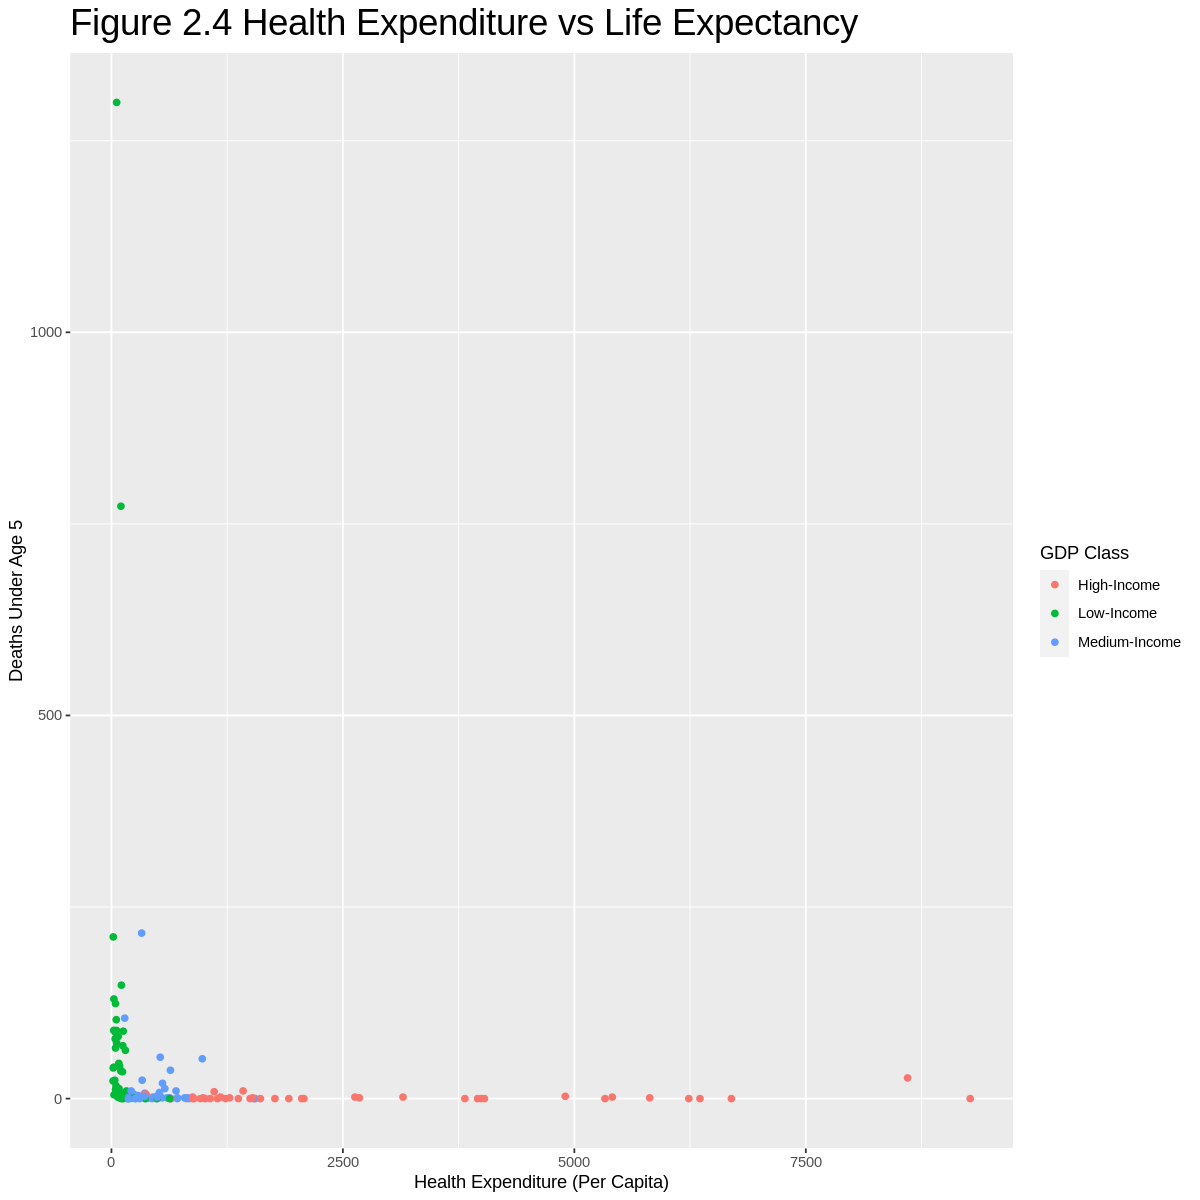

In [29]:
life_expectancy_2013 <- training %>%
    filter(year == 2013) %>%
    filter(gdp_classification == "High-Income" |
           gdp_classification == "Low-Income" | 
           gdp_classification == "Medium-Income")


Proposal_Plot_2.1<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = adult_mortality, 
               color = gdp_classification))+
    geom_point()+
    labs(x = "Health Expenditure (Per Capita)", 
         y = "Mortality Rate of Adults (15-60 years old)", 
         color = "GDP Class") +
    ggtitle("Figure 2.1 Health Expenditure vs Adult Mortality") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.2<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = life_expectancy, color = gdp_classification))+
    geom_point()+
    labs(y = "Life Expectancy (Years)", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 2.2 Health Expenditure vs Life Expectancy") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.3<-life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = infant_deaths, 
               color = gdp_classification)) +
    geom_point()+
    labs(y = "Infant Deaths", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 2.3 Health Expenditure vs Infant Deaths") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.4 <- life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = under_five_deaths, 
               color = gdp_classification))+
    geom_point()+
    labs(y = "Deaths Under Age 5", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 2.4 Health Expenditure vs Life Expectancy") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_2.1
Proposal_Plot_2.2
Proposal_Plot_2.3
Proposal_Plot_2.4



**Graph Set 3**

We graph health outcome variables against health expenditure for 2013

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


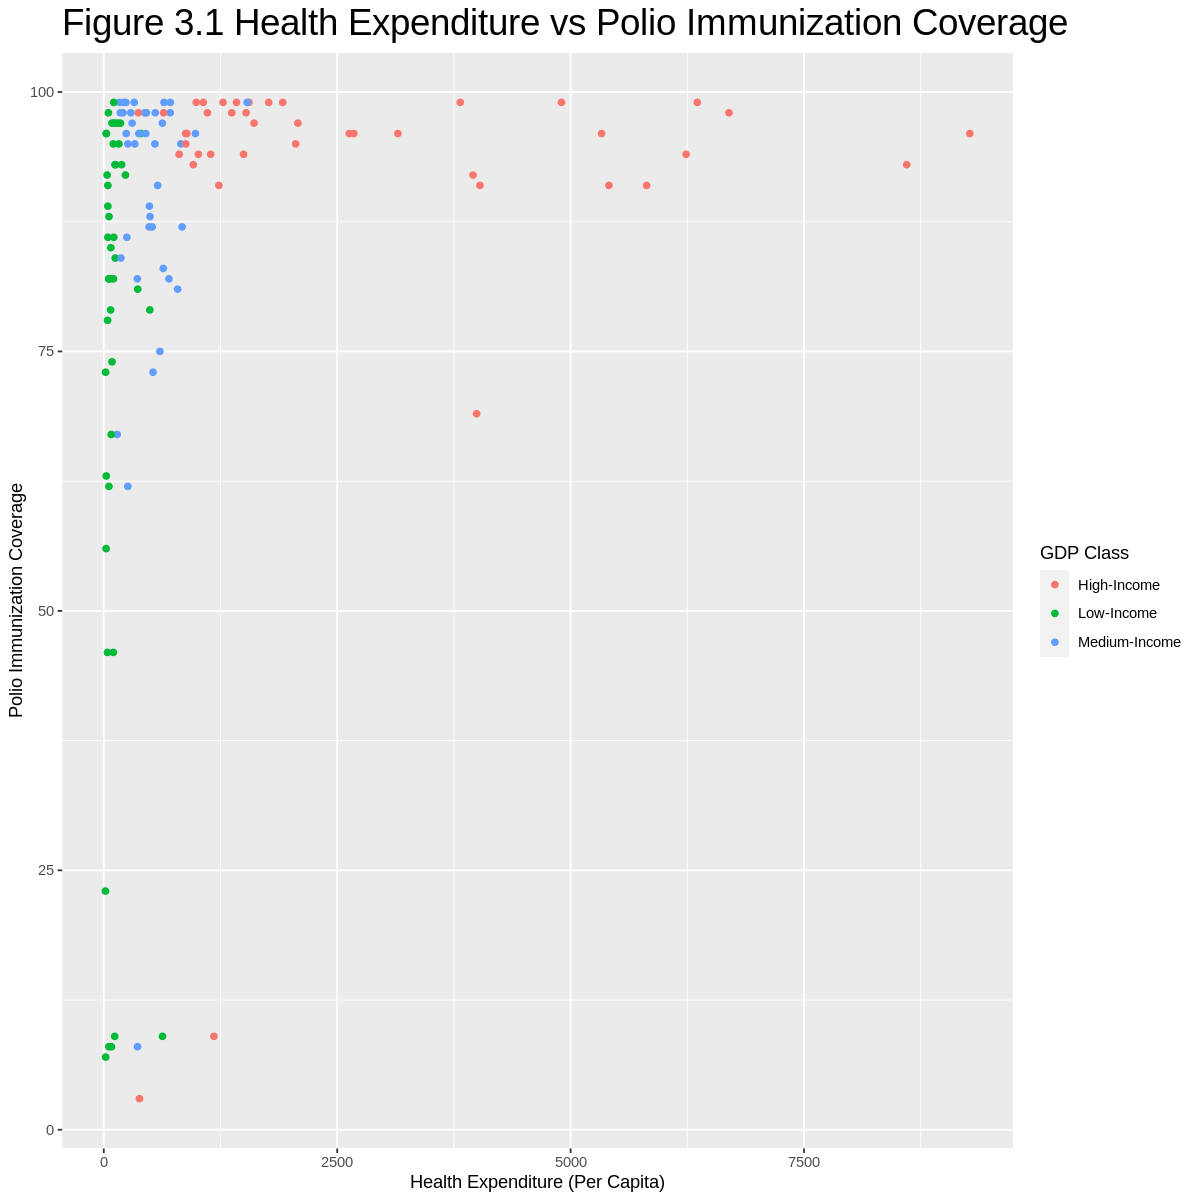

Warning message:
“Removed 1 rows containing missing values (geom_point).”


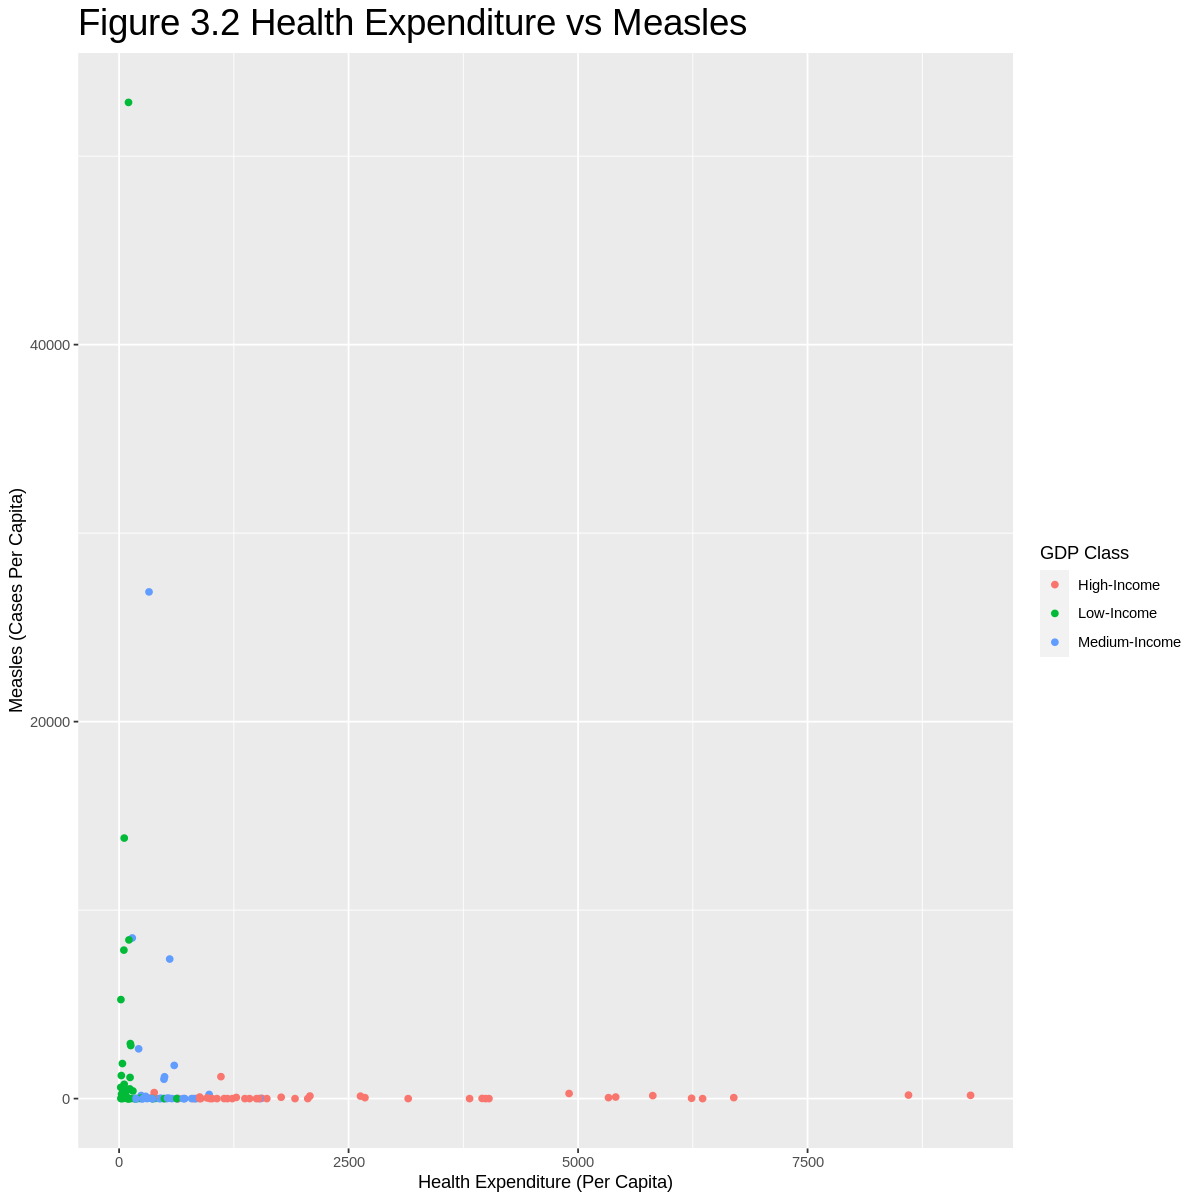

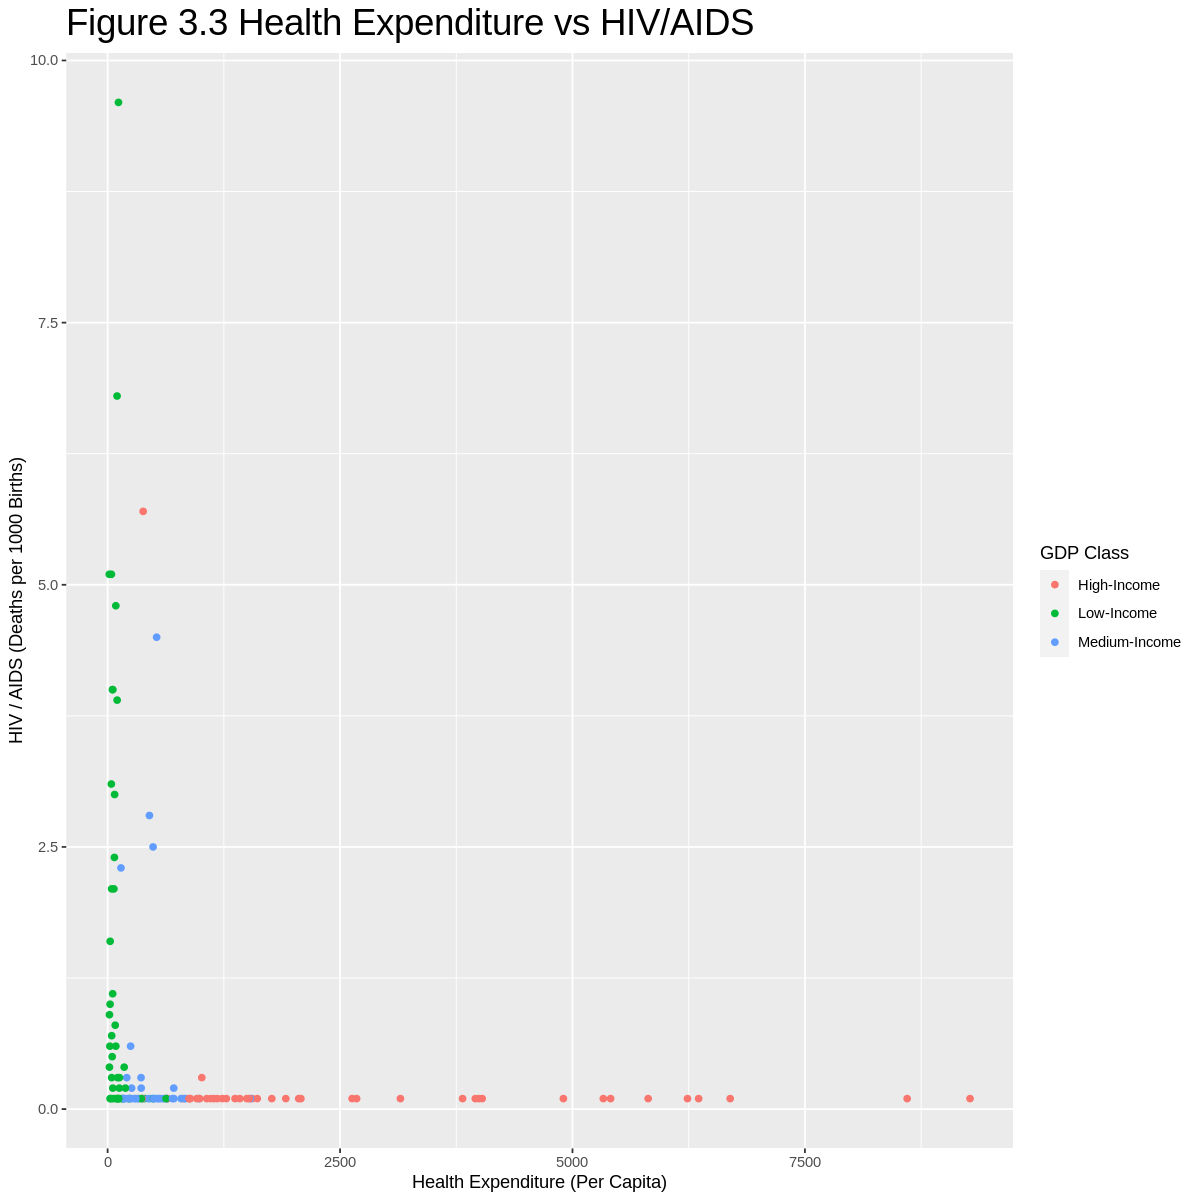

In [30]:
Proposal_Plot_3.1 <- life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = polio, 
               color = gdp_classification)) +
    geom_point() +
    labs(y = "Polio Immunization Coverage", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 3.1 Health Expenditure vs Polio Immunization Coverage") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_3.2 <- life_expectancy_2013 %>%
    ggplot(aes(x = health_exp_per_capita, 
               y = measles, 
               color = gdp_classification))+
    geom_point()+
    labs(y = "Measles (Cases Per Capita)", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 3.2 Health Expenditure vs Measles") +
    theme(plot.title = element_text(size=22))

Proposal_Plot_3.3 <- life_expectancy_2013 %>%
ggplot(aes(x = health_exp_per_capita, 
           y = HIV_AIDS, 
           color = gdp_classification))+
    geom_point()+
    labs(y = "HIV / AIDS (Deaths per 1000 Births)", 
         x = "Health Expenditure (Per Capita)", 
         color = "GDP Class") +
    ggtitle("Figure 3.3 Health Expenditure vs HIV/AIDS") +
    theme(plot.title = element_text(size=22))


Proposal_Plot_3.1
Proposal_Plot_3.2
Proposal_Plot_3.3

### 4. Method:

**To answer our question:** At a given health expenditure, what will be the level of mortality and health outcomes. How do they differ between high-income, medium-income, and low-income countries? 

We will be running a linear regression:

$Mortality_i = \beta_1 * HealthExpenditure + \beta_2 * GDPClassification + \epsilon$
$Health_i = \alpha_1 * HealthExpenditure + \alpha_2 * GDPClassification + \epsilon$

Where GDP Classification is a dummy variable and takes a value of 0 if low-income, 1 if medium-income, and 2 if high-income.

We want to use multiple mortality and health outcome variables rather than a single determinant as robustness checks and also to see how health expenditure affect different age groups and disease control. 

To visualize the outcomes, we would do a scatterplot and regression line. We would want to remove some outliers so that the plot display datapoints better.


### 5. Expected Outcomes:

**What do you expect to find?**
We expect to find that high income countries will naturally have a higher health expenditure per capita; however, we would like to see if there's a certain point where the marginal return of health expenditure begins to drop.

**What impact could such findings have?**
The results can potentially show what health inequality looks like around the world in terms of country's investments into health along with health outcomes and mortality. 

**What future questions could this lead to?**
This can lead to questions on how low-income countries can be supported and how dedicated funding and policies can improve livelihood around the world.

